# CE-40717: Machine Learning

## HW6-Gradient Boosting

In [ ]:
!pip install -U scikit-learn
!pip install xgboost

     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Load & Prepare Dataset:

In [ ]:
np.random.seed(seed=42)

# load dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)


# split dataset to train set and validation set:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

data_train = xgb.DMatrix(data=x_train, label=y_train)
data_val = xgb.DMatrix(data=x_val, label=y_val)

n_val = y_train.size
class_names = iris.target_names
print(n_val, class_names)

135 ['setosa' 'versicolor' 'virginica']


### Set Hyperparameter for Both Gradine Boost & XGboost:

### Define Classifiers:

In [ ]:
# define classifier for gradient boost:
GB_clf = GradientBoostingClassifier(n_estimators=5,learning_rate=0.01,max_depth=3,random_state=0)

# define classifier for XGboost:
XGboost_clf = xgb.XGBClassifier(eta=0.3,silent=True,objective="multi:softprob",num_class=3,max_depth=3)

### Train Both Classifiers:

In [ ]:
# train  gradient boost:
tic = time()
trained_GB = GB_clf.fit(x_train,y_train)
toc = time()

# calculate training time for GB:
GB_train_time = toc - tic
print(f"GB_train_time: {1000.0*GB_train_time} millisecond")


# train XGboost:
tic = time()
trained_XGboost = XGboost_clf.fit(x_train,y_train)
toc = time()

# calculate training time for XGboost:
XGboost_train_time = toc - tic
print(f"XGboost_train_time: {1000.0*XGboost_train_time} millisecond")

GB_train_time: 15.887260437011719 millisecond
XGboost_train_time: 26.45421028137207 millisecond


### Prediction on Validation Set:

In [ ]:
# prediction for gradient boost:
tic = time()
y_pred_GB = GB_clf.predict(x_val)
toc = time()

# calculate validation time per data for GB:
GB_val_time_per_data = (toc - tic)/n_val
print(f"GB_val_time_per_data: {1000.0*GB_val_time_per_data} millisecond")


# prediction for XGboost:
tic = time()
y_pred_XGboost = XGboost_clf.predict(x_val)
toc = time()
y_pred_XGboost = [round(value) for value in y_pred_XGboost]

# calculate validation time per data for XGboost:
XGboost_val_time_per_data = (toc - tic)/n_val
print(f"XGboost_val_time_per_data: {1000.0*XGboost_val_time_per_data} millisecond")

GB_val_time_per_data: 0.012722721806278935 millisecond
XGboost_val_time_per_data: 0.0055683983696831595 millisecond


### Evaluation (precision - recall - F1 score - confusion matrix):

#### for Gradient Boost:

In [ ]:
# calculate precision
precision_GB = precision_score(y_val , y_pred_GB,average='macro')

print(f"precision_GB: {precision_GB}")

precision_GB: 1.0


In [ ]:
# calculate recall
recall_GB = recall_score(y_val,y_pred_GB,average='macro')

print(f"recall_GB: {recall_GB}")

recall_GB: 1.0


In [ ]:
# calculate F1 score
f1_GB = f1_score(y_val,y_pred_GB,average='macro')

print(f"F1_GB: {f1_GB}")

F1_GB: 1.0


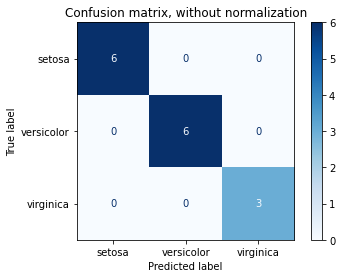

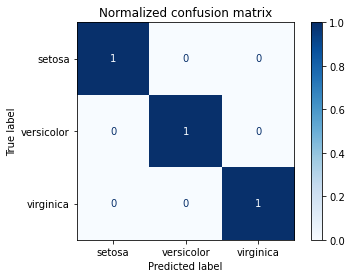

In [ ]:
# calculate confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(trained_GB, x_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### for XGboost:

In [ ]:
# calculate precision
precision_XGboost = precision_score(y_val,y_pred_XGboost,average='macro')

print(f"precision_XGboost: {precision_XGboost}")

precision_XGboost: 1.0


In [ ]:
# calculate recall
recall_XGboost = recall_score(y_val,y_pred_XGboost,average='macro')

print(f"recall_XGboost: {recall_XGboost}")

recall_XGboost: 1.0


In [ ]:
# calculate F1 score
f1_XGboost = f1_score(y_val,y_pred_XGboost,average='macro')

print(f"F1_XGboost: {f1_XGboost}")

F1_XGboost: 1.0


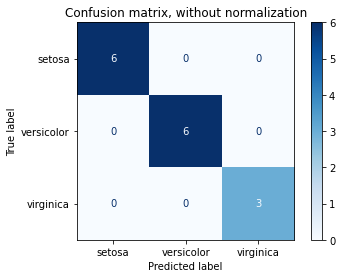

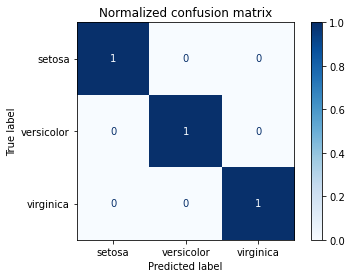

In [ ]:
# calculate confusion matrix
#cm_XGboost = confusion_matrix(y_val,y_pred_XGboost)

#print(f"conf_mat_XGboost: {cm_XGboost}")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(trained_XGboost, x_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

### Compare Gradient Boost & XGboost Algorithm According to Evaluation Part Results:

As we can see, confusion matrix and all evaluation metrics in both models are equal because of low number of datas in dataset. we can see that training phase execution time in GB is better that XGB but validation phase execution time in XGB is about 1/3 in GB. so if we add more data in dataset, XGB has little more execution time for training but very better execution time in validation and test phase. so I think XGB is better.

Also I think XGB is better in precision and other metrics if we have large dataset but we can't see this result in this Homework.